In [167]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [317]:
os.chdir('C:/Users/admin/Documents/Python Files')
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

In [318]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv("Test_data.csv")
train.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [319]:
# comibining train and test so that it will be easier to preprocess it together than separate
train=train.append(test)
train.shape

(5000, 21)

In [320]:
# Removing whitespaces in column names
train.columns=train.columns.str.replace(' ','')

# EDA analysis

In [321]:
train.columns

Index(['state', 'accountlength', 'areacode', 'phonenumber',
       'internationalplan', 'voicemailplan', 'numbervmailmessages',
       'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes',
       'totalevecalls', 'totalevecharge', 'totalnightminutes',
       'totalnightcalls', 'totalnightcharge', 'totalintlminutes',
       'totalintlcalls', 'totalintlcharge', 'numbercustomerservicecalls',
       'Churn'],
      dtype='object')

In [322]:
# univariate analysis
# converting area code to object data type
train['areacode']=train['areacode'].astype('object')

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 21 columns):
state                         5000 non-null object
accountlength                 5000 non-null int64
areacode                      5000 non-null object
phonenumber                   5000 non-null object
internationalplan             5000 non-null object
voicemailplan                 5000 non-null object
numbervmailmessages           5000 non-null int64
totaldayminutes               5000 non-null float64
totaldaycalls                 5000 non-null int64
totaldaycharge                5000 non-null float64
totaleveminutes               5000 non-null float64
totalevecalls                 5000 non-null int64
totalevecharge                5000 non-null float64
totalnightminutes             5000 non-null float64
totalnightcalls               5000 non-null int64
totalnightcharge              5000 non-null float64
totalintlminutes              5000 non-null float64
totalintlcalls          

In [324]:
# Counting no. of True and false cases in Churn variable
churn_class = train['Churn'].value_counts() #value_counts() gives count of classes
# Proportion of true cases in Churn variable
imbalance = churn_class/len(train.index)    #This is a case of class imbalance problem
print(imbalance)

 False.    0.8586
 True.     0.1414
Name: Churn, dtype: float64


# Data Visualization

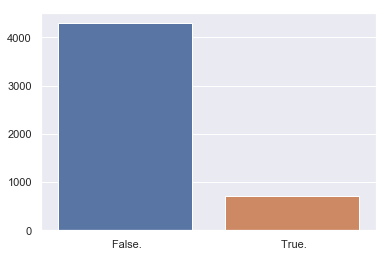

In [325]:
Y = train["Churn"].value_counts()
sns.barplot(Y.index, Y.values)          #This is a case of class imbalance problem

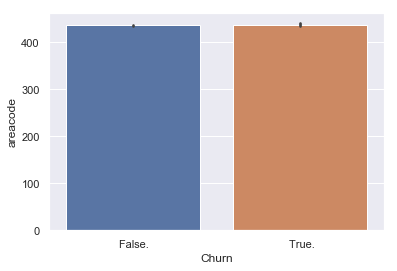

In [345]:
# Visualization
sns.barplot(x="Churn", y="areacode", data=train) # area code is not statistically significant

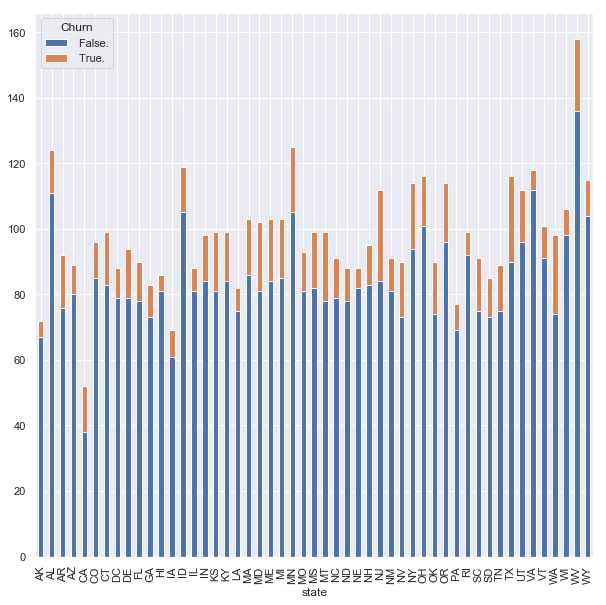

In [352]:
# churning of customer w.r.t State
state_vs_churn=pd.crosstab(data["state"],data["Churn"])
# Visualization
state_vs_churn.plot(kind="bar", 
                 figsize=(10,10),
                    stacked = True)

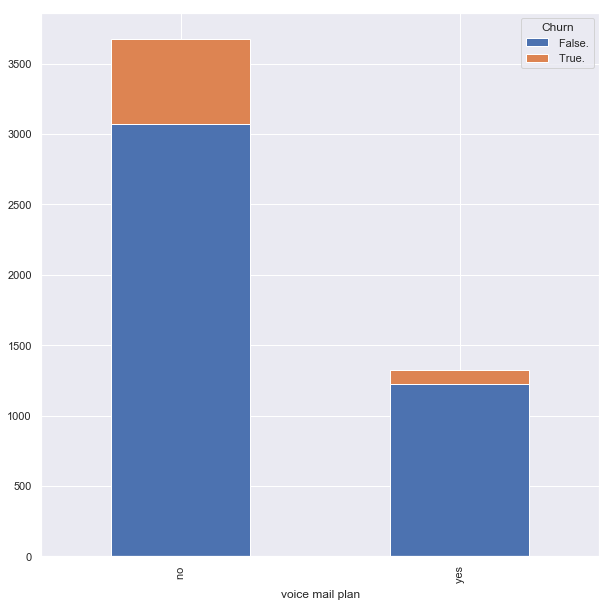

In [353]:
# churning of customer w.r.t voice.mail.plan
voicemailplan_vs_churn=pd.crosstab(data["voice mail plan"],data["Churn"])
# Visualization
voicemailplan_vs_churn.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

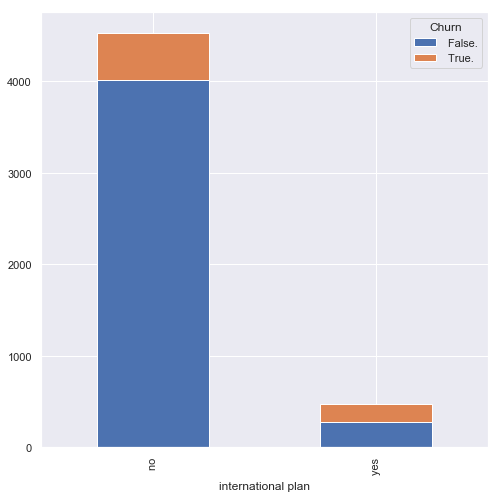

In [336]:
# churning of customer w.r.t international.plan
intlplan_vs_churn=pd.crosstab(data["international plan"],data["Churn"])
# Visualization
intlplan_vs_churn.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

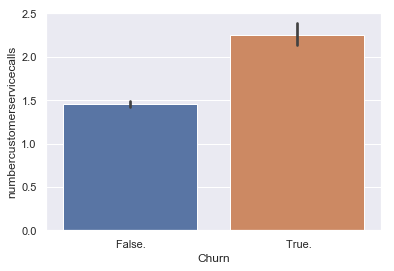

In [348]:
# churning of customer w.r.t number.customer.service.calls
no_servicecall_vs_churn=pd.crosstab(data["number customer service calls"],data["Churn"])
# Visualization
sns.barplot(x="Churn", y="numbercustomerservicecalls", data=train)

## Missing value Analysis

In [262]:
# Checking missing values in dataframe
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index().rename(columns = {'index':'Variables',0:'missing percentage'})
print(missing_val)
# no missing value found

                        Variables  missing percentage
0                           state                   0
1                  account length                   0
2                       area code                   0
3                    phone number                   0
4              international plan                   0
5                 voice mail plan                   0
6           number vmail messages                   0
7               total day minutes                   0
8                 total day calls                   0
9                total day charge                   0
10              total eve minutes                   0
11                total eve calls                   0
12               total eve charge                   0
13            total night minutes                   0
14              total night calls                   0
15             total night charge                   0
16             total intl minutes                   0
17               total intl 

# Outlier Analysis
 There are outliers in the data but after analyzing the data I came to a conclusion that there's no need to remove outliers 

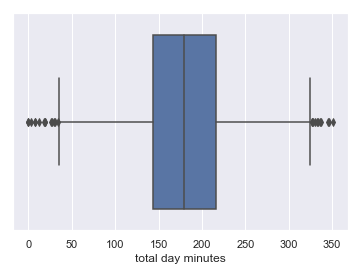

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = sns.boxplot(train['total day minutes'])
plt.show()

# # Feature Selection

In [263]:
#let's separate continuous data from categorical data for feature selection
num_columns=train.select_dtypes(exclude=['object'])
numcol=num_columns.columns
numcol

Index(['accountlength', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls',
       'totalevecharge', 'totalnightminutes', 'totalnightcalls',
       'totalnightcharge', 'totalintlminutes', 'totalintlcalls',
       'totalintlcharge', 'numbercustomerservicecalls'],
      dtype='object')

In [264]:
# subsetting on continuous variables in df_corr
df_corr = train.loc[:,numcol]

In [265]:
# Correlation analysis
# generating correlation matrix using .corr() built-in function
corr = df_corr.corr()

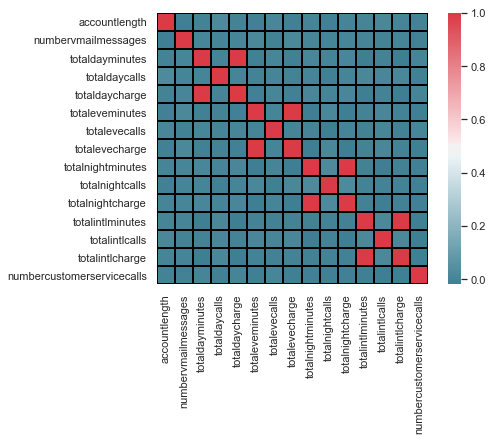

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Plotting correlation matrix using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,linewidths=1 , linecolor= 'black')

In [267]:
# Now Chi-square test of independence for Categorical data
# As chi-square is only for categorical variables so we will select only categorical variables from training data
catcol = train.columns[(train.dtypes=="object")]
catcol = list(catcol)
catcol.remove('Churn')
catcol

['state', 'areacode', 'phonenumber', 'internationalplan', 'voicemailplan']

In [268]:
# Applying Chi-square test of independence for Categorical data
for i in catcol:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['Churn'], train[i]))
    print(p)

state
7.850836224371827e-05
areacode
0.7546581385329686
phonenumber
0.493350889587423
internationalplan
1.9443947474998577e-74
voicemailplan
7.164501780988496e-15


In [269]:
# Dimensionality Reduction 
train=train.drop(['state','totaldayminutes','totaleveminutes','totalnightminutes','totalintlminutes','accountlength','phonenumber','areacode'],axis=1)
# axis = 1 for columns

In [270]:
train.head(5)

,state,internationalplan,voicemailplan,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn
0,KS,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,OH,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,NJ,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
3,OH,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False.
4,OK,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.


In [126]:
# Converting our factor variables into numeric factor levels
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [271]:
_ = cat_to_num(train)
train.head(5)

,state,internationalplan,voicemailplan,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn
0,16,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [272]:
train.dtypes

state                          object
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldaycalls                   int64
totaldaycharge                float64
totalevecalls                   int64
totalevecharge                float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
Churn                          object
dtype: object

In [273]:
# Again select only numeric and only categorical variables separately from our new data
num_columns=train.select_dtypes(exclude=['object'])
numcol=num_columns.columns
print(numcol)
catcol = train.columns[(train.dtypes=="object")]
print(catcol)

Index(['numbervmailmessages', 'totaldaycalls', 'totaldaycharge',
       'totalevecalls', 'totalevecharge', 'totalnightcalls',
       'totalnightcharge', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')
Index(['state', 'internationalplan', 'voicemailplan', 'Churn'], dtype='object')


# Feature Scaling

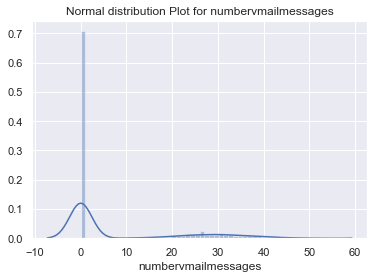

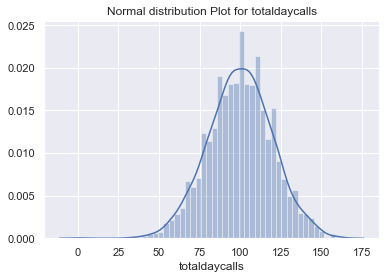

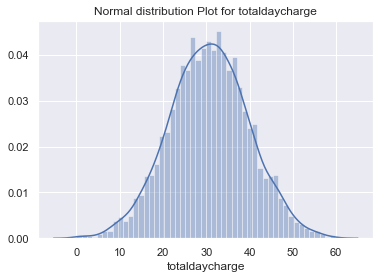

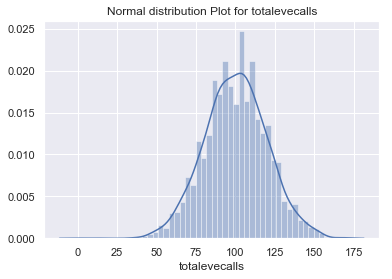

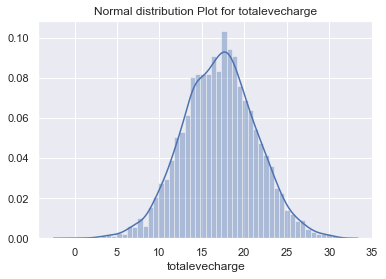

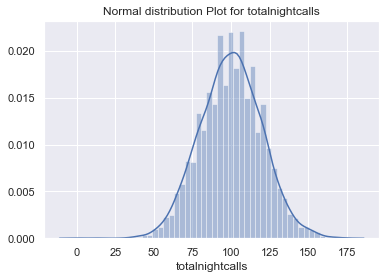

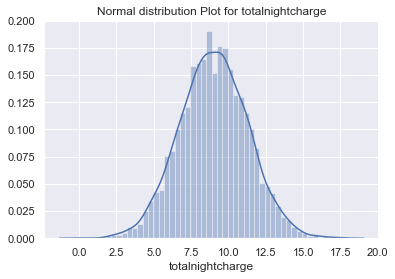

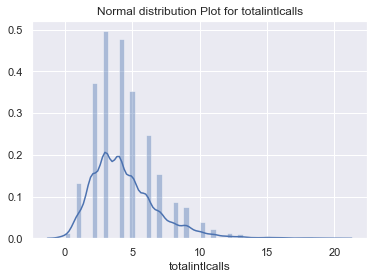

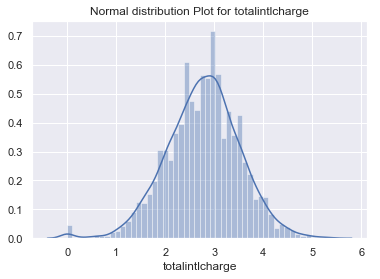

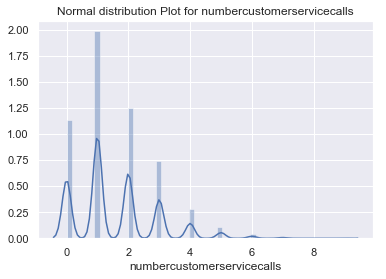

In [136]:
for i in numcol:
    sns.distplot(train[i],bins =50)
    plt.title("Normal distribution Plot for "+str(i))
    plt.show()

In [274]:
# Standardization
for i in numcol:
    print(i)
    train[i] = (train[i] - train[i].mean())/train[i].std()

numbervmailmessages
totaldaycalls
totaldaycharge
totalevecalls
totalevecharge
totalnightcalls
totalnightcharge
totalintlcalls
totalintlcharge
numbercustomerservicecalls


In [275]:
train.describe() # we can see now our data is standarized
# Z is negative when the raw score is below the mean and Z is positive when above mean

,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,5.969447e-16,2.180811e-16,-2.541500e-15,-1.266931e-16,-3.076650e-15,-1.446631e-16,-2.134724e-14,-1.159961e-16,2.229520e-14,-8.526513e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.724919e-01,-5.044042e+00,-3.345278e+00,-5.053389e+00,-3.969035e+00,-5.006302e+00,-3.965995e+00,-1.805284e+00,-3.717163e+00,-1.202116e+00
25%,-5.724919e-01,-6.570153e-01,-6.788497e-01,-6.653218e-01,-6.782472e-01,-6.472971e-01,-6.631000e-01,-5.841773e-01,-6.320420e-01,-4.366320e-01
50%,-5.724919e-01,-1.482513e-03,-3.238133e-03,-9.633573e-03,8.303305e-03,4.048363e-03,9.974656e-04,-1.771418e-01,1.180931e-02,-4.366320e-01
75%,6.824547e-01,6.540503e-01,6.658247e-01,6.964922e-01,6.622718e-01,6.553939e-01,6.782889e-01,6.369291e-01,6.288335e-01,3.288519e-01
max,3.266168e+00,3.276181e+00,3.177266e+00,3.520995e+00,3.224618e+00,3.761811e+00,3.849244e+00,6.335426e+00,3.526165e+00,5.687239e+00


In [276]:
train.head(5)

,state,internationalplan,voicemailplan,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn
0,16,0,1,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,-0.436632,0
1,35,0,1,1.346838,1.158306,-0.347047,0.141679,-0.101079,0.154359,1.069711,-0.584177,1.245858,-0.436632,0
2,31,0,0,-0.572492,0.704476,1.171169,0.494742,-1.571927,0.204462,-0.746662,0.229894,0.695901,-1.202116,0
3,35,1,0,-0.572492,-1.463825,2.210236,-0.614884,-2.744881,-0.547090,-0.069370,1.043965,-1.329548,0.328852,0
4,36,1,0,-0.572492,0.654050,-0.252090,1.099993,-1.034323,1.056222,-0.267280,-0.584177,-0.055259,1.094336,0


In [277]:
#repalace target categories with Yes and No
train['Churn'] = train['Churn'].replace(0, 'No')
train['Churn'] = train['Churn'].replace(1, 'Yes')
train.head(5)

,state,internationalplan,voicemailplan,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn
0,16,0,1,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,-0.436632,No
1,35,0,1,1.346838,1.158306,-0.347047,0.141679,-0.101079,0.154359,1.069711,-0.584177,1.245858,-0.436632,No
2,31,0,0,-0.572492,0.704476,1.171169,0.494742,-1.571927,0.204462,-0.746662,0.229894,0.695901,-1.202116,No
3,35,1,0,-0.572492,-1.463825,2.210236,-0.614884,-2.744881,-0.547090,-0.069370,1.043965,-1.329548,0.328852,No
4,36,1,0,-0.572492,0.654050,-0.252090,1.099993,-1.034323,1.056222,-0.267280,-0.584177,-0.055259,1.094336,No


## Dealing with Target class imbalance problem for categorical Target Variable-Churn

In [278]:
print(imbalance)

 False.    0.8586
 True.     0.1414
Name: Churn, dtype: float64


In [279]:
# As sampling is only applied on training dataset, so lets divide our whole data into train and test
from sklearn.model_selection import train_test_split
#Divide data into train and test
X = train.values[:, 0:13]
Y = train.values[:,13]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25)

In [232]:
# from imblearn.over_sampling import SMOTE
# method = SMOTE(random_state=2019)
# X_train_smote, y_train_smote = method.fit_sample(X_train, y_train)


## Decision Tree

In [280]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
#Decision Tree on sampled Train
DT_model= tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
#predict new test cases
DT_Predictions=DT_model.predict(X_test)

In [281]:
CM = pd.crosstab(y_test, DT_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

col_0,No,Yes
row_0,,
No,1023,47
Yes,42,138


In [282]:
print('Accuracy- ',((TN+TP)/(TN+TP+FN+FP))*100)
print('FNR- ',((FN)/(TP+FN))*100)
print('Sensitivity/Recall/TPR-  ',((TP)/(TP+FP))*100)

Accuracy-  92.88
FNR-  23.333333333333332
Sensitivity/Recall/TPR-   74.5945945945946


In [233]:
# #Decision Tree on sampled Train
# DT_model= tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_smote, y_train_smote)
# #predict new test cases
# DT_pred=DT_model.predict(X_test)

In [ ]:
# CM = pd.crosstab(y_test, DT_pred)

# #let us save TP, TN, FP, FN
# TN = CM.iloc[0,0]
# FN = CM.iloc[1,0]
# TP = CM.iloc[1,1]
# FP = CM.iloc[0,1]

# CM

In [ ]:
# print('Accuracy- ',((TN+TP)/(TN+TP+FN+FP))*100)
# print('FNR- ',((FN)/(TP+FN))*100)
# print('Sensitivity/Recall/TPR-  ',((TP)/(TP+FP))*100)

## Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)
# predict on new test cases
RF_Predictions = RF_model.predict(X_test)

In [284]:
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

col_0,No,Yes
row_0,,
No,1061,9
Yes,50,130


In [285]:
print('Accuracy- ',((TN+TP)/(TN+TP+FN+FP))*100)
print('FNR- ',((FN)/(TP+FN))*100)
print('Sensitivity/Recall/TPR-  ',((TP)/(TP+FP))*100)

Accuracy-  95.28
FNR-  27.77777777777778
Sensitivity/Recall/TPR-   93.5251798561151


## Logistic Regression

In [286]:
#create copy of train before processing for Logistic Regression
df=train.copy()
# train = df.copy()

In [287]:
#replace target categories with 1 and 0
train['Churn'] = train['Churn'].replace('No',0)
train['Churn'] = train['Churn'].replace('Yes',1)
train.head(5)

,state,internationalplan,voicemailplan,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn
0,16,0,1,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,-0.436632,0
1,35,0,1,1.346838,1.158306,-0.347047,0.141679,-0.101079,0.154359,1.069711,-0.584177,1.245858,-0.436632,0
2,31,0,0,-0.572492,0.704476,1.171169,0.494742,-1.571927,0.204462,-0.746662,0.229894,0.695901,-1.202116,0
3,35,1,0,-0.572492,-1.463825,2.210236,-0.614884,-2.744881,-0.547090,-0.069370,1.043965,-1.329548,0.328852,0
4,36,1,0,-0.572492,0.654050,-0.252090,1.099993,-1.034323,1.056222,-0.267280,-0.584177,-0.055259,1.094336,0


In [288]:
#Create logistic data. Save target variable first
train_logit = pd.DataFrame(train['Churn'])

In [289]:
#Add continous variables
train_logit = train_logit.join(train[numcol])

In [290]:
train_logit.head(5)

,Churn,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,-0.436632
0,0,-0.572492,1.158306,-2.030073,-1.371448,0.222414,-1.348746,0.704677,-0.584177,0.119118,1.094336
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,-0.436632
0,0,-0.572492,1.158306,-2.030073,-1.371448,0.222414,-1.348746,0.704677,-0.584177,0.119118,1.094336
1,0,1.346838,1.158306,-0.347047,0.141679,-0.101079,0.154359,1.069711,-0.584177,1.245858,-0.436632


In [291]:
catcol

Index(['state', 'internationalplan', 'voicemailplan', 'Churn'], dtype='object')

In [292]:
##Create dummies for categorical variables
for i in catcol[0:3]:
    temp = pd.get_dummies(train[i], prefix = i)
    train_logit = train_logit.join(temp)

In [294]:
train_logit.shape

(55010, 66)

In [295]:
train_logit.head(5)

,Churn,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlcalls,totalintlcharge,...,state_45,state_46,state_47,state_48,state_49,state_50,internationalplan_0,internationalplan_1,voicemailplan_0,voicemailplan_1
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,...,0,0,0,0,0,0,1,0,0,1
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,...,0,0,0,0,0,0,1,0,1,0
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,...,0,0,0,0,0,0,1,0,0,1
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,...,0,0,0,0,0,0,1,0,1,0
0,0,1.273018,0.502773,1.573917,-0.060071,-0.063843,-0.446883,0.876199,-0.584177,-0.095499,...,0,0,0,0,0,0,1,0,0,1


In [298]:
Sample_Index = np.random.rand(len(train_logit)) < 0.75

train = train_logit[Sample_Index]
test = train_logit[~Sample_Index]

In [299]:
#select column indexes for independent variables
train_cols = train.columns[1:66]

In [314]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['Churn'], train[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.363960
         Iterations 7


In [313]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                41227
Model:                          Logit   Df Residuals:                    41164
Method:                           MLE   Df Model:                           62
Date:                Wed, 13 Mar 2019   Pseudo R-squ.:                 0.06499
Time:                        14:01:03   Log-Likelihood:                -15005.
converged:                       True   LL-Null:                       -16048.
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
numbervmailmessages           -0.0998      0.018     -5.464      0.000      -0.136      -0.064
totaldaycalls                 -0.0019      0.015     -0.126      0.899      -0.032       0.028
totaldaycharge                 0.2689      0.015     17.506      0.000       0.239       0.299
totalevecalls                 -0.0445      0.015     -2.904      0.004      -0.074      -0.014
totalevecharge                 0.1222      0.015      8.086      0.000       0.093       0.152
totalnightcalls               -0.0191      0.015     -1.268      0.205      -0.049       0.010
totalnightcharge               0.0652      0.015      4.367      0.000       0.036       0.095
totalintlcalls                -0.0596      0.015     -3.872      0.000      -0.090      -0.029
totalintlcharge                0.1000      0.015      6.586      0.000       0.070       0.130
numbercustomerservicecalls     0.3348      0.014     23.956      0.000       0.307       0.362
state_0                       -0.0238        nan        nan        nan         nan         nan
state_1                       -0.1244        nan        nan        nan         nan         nan
state_2                       -0.1089        nan        nan        nan         nan         nan
state_3                       -0.4118        nan        nan        nan         nan         nan
state_4                        0.8709        nan        nan        nan         nan         nan
state_5                       -0.1416        nan        nan        nan         nan         nan
state_6                        0.1939        nan        nan        nan         nan         nan
state_7                       -0.1143        nan        nan        nan         nan         nan
state_8                        0.1322        nan        nan        nan         nan         nan
state_9                        0.0588        nan        nan        nan         nan         nan
state_10                      -0.0831        nan        nan        nan         nan         nan
state_11                      -0.7784        nan        nan        nan         nan         nan
state_12                      -0.0520        nan        nan        nan         nan         nan
state_13                      -0.2355        nan        nan        nan         nan         nan
state_14                       0.0123        nan        nan        nan         nan         nan
state_15                       0.1229        nan        nan        nan         nan         nan
state_16                       0.2117        nan        nan        nan         nan         nan
state_17                       0.0590        nan        nan        nan         nan         nan
state_18                      -0.1751        nan        nan        nan         nan         nan
state_19                       0.3239        nan        nan        nan         nan         nan
state_20                       0.2497        nan        nan        nan         nan         nan
state_21   

In [315]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [316]:
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [303]:
#Build confusion matrix
CM = pd.crosstab(test['Churn'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

ActualVal,0,1
Churn,,
0,11954,19
1,1790,20


In [304]:
print('Accuracy- ',((TN+TP)/(TN+TP+FN+FP))*100)
print('FNR- ',((FN)/(TP+FN))*100)
print('Sensitivity/Recall/TPR-  ',((TP)/(TP+FP))*100)

Accuracy-  86.8751360371472
FNR-  98.89502762430939
Sensitivity/Recall/TPR-   51.28205128205128


## K- nearest neighbor

In [305]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [306]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [307]:
#Build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

col_0,No,Yes
row_0,,
No,1069,1
Yes,165,15


In [308]:
print('Accuracy- ',((TN+TP)/(TN+TP+FN+FP))*100)
print('FNR- ',((FN)/(TP+FN))*100)
print('Sensitivity/Recall/TPR-  ',((TP)/(TP+FP))*100)

Accuracy-  86.72
FNR-  91.66666666666666
Sensitivity/Recall/TPR-   93.75


## Naive Bayes

In [309]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [310]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [311]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

col_0,No,Yes
row_0,,
No,997,73
Yes,97,83


In [312]:
print('Accuracy- ',((TN+TP)/(TN+TP+FN+FP))*100)
print('FNR- ',((FN)/(TP+FN))*100)
print('Sensitivity/Recall/TPR-  ',((TP)/(TP+FP))*100)

Accuracy-  86.4
FNR-  53.888888888888886
Sensitivity/Recall/TPR-   53.205128205128204
